나) 리뷰 숫자(Reviews)와 평점(Ratings) 사이에 상관 관계가 있을까?

## 1. 데이터 로드 및 전처리

In [1]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [8]:
#데이터 로드 및 확인
data = pd.read_csv("app_data_d.csv", index_col=[0])
data
print(len(data))
print(type(data))
data.head()

8884
<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0.1,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000 ~ 100,000",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"1,000,000 ~ 10,000,000",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"10,000,000 ~ 100,000,000",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000 ~ 1,000,000",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
#데이터 추가 전처리(Installs 컬럼): 10억 건 이상 다운로드 횟수를 1억 건 이상 범주로 통합
data = data.replace('1,000,000,000+', '100,000,000 ~')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8884 entries, 0 to 9365
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    8884 non-null   int64  
 1   App             8884 non-null   object 
 2   Category        8884 non-null   object 
 3   Rating          8884 non-null   float64
 4   Reviews         8884 non-null   int64  
 5   Size            7417 non-null   float64
 6   Installs        8884 non-null   object 
 7   Type            8884 non-null   object 
 8   Price           8884 non-null   float64
 9   Content Rating  8884 non-null   object 
 10  Genres          8884 non-null   object 
 11  Last Updated    8884 non-null   object 
 12  Current Ver     8880 non-null   object 
 13  Android Ver     8882 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.0+ MB


In [12]:
data.describe()

,Unnamed: 0.1,Rating,Reviews,Size,Price
count,8884.000000,8884.000000,8.884000e+03,7417.000000,8884.000000
mean,5297.163890,4.187663,4.726452e+05,22743.688756,0.963348
std,3100.740894,0.522521,2.906031e+06,23437.009098,16.196519
min,0.000000,1.000000,1.000000e+00,8.500000,0.000000
25%,2668.750000,4.000000,1.640000e+02,5100.000000,0.000000
50%,5144.500000,4.300000,4.682000e+03,14000.000000,0.000000
75%,7995.250000,4.500000,7.092500e+04,33000.000000,0.000000
max,10840.000000,5.000000,7.815831e+07,100000.000000,400.000000


## 2. 리뷰(Reviews)와 평점(Ratings) 사이에 상관 관계가 있을까?

### (1) 리뷰(Reviews)와 평점(Ratings)으로 구성된 df 형성

In [15]:
data_review_rating=data[["Reviews","Rating"]]
data_review_rating

,Reviews,Rating
0,159,4.1
1,967,3.9
2,87510,4.7
3,215644,4.5
4,967,4.3
...,...,...
9361,7,4.0
9362,38,4.5
9363,4,5.0
9364,114,4.5


### (2) 리뷰(Reviews)와 평점(Ratings) 간 상관분석 수행

<AxesSubplot:>

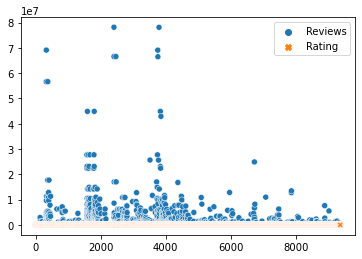

In [30]:
# (1) 시각화
sns.scatterplot(data = data_review_rating)

In [45]:
# (2) Pearson/spearman 상관분석
#H0: Content Reviews와 Rating 두 변수는 독립이다. (관련이 없다.)
#H1: Content Reviews와 Rating 두 변수는 관련이 있다.

print("PearsonrResult",stats.pearsonr(data_review_rating["Reviews"],data_review_rating["Rating"]))
print(stats.spearmanr(data_review_rating["Reviews"],data_review_rating["Rating"]))

# p-value < 0.05, reject H0, Content Reviews과 Rating 간 상관관계가 있다.

PearsonrResult (0.06871090174607408, 8.985956016374743e-11)
SpearmanrResult(correlation=0.15057136609659533, pvalue=3.2924847930244618e-46)


=> 비록 pearson과 spearman 상관분석 결과에 따르면 Review와 Rating 간 상관관계가 있는 것으로 나오나, 상관계수 값이 0.069로 그 값이 굉장히 작고 시각화 결과도 상관관계가 유의미하게 있어보이지 않는다고 판단할 수 있다.

### (3) 평점(Ratings)과 상관관계를 지니는 타 변수 확인하기

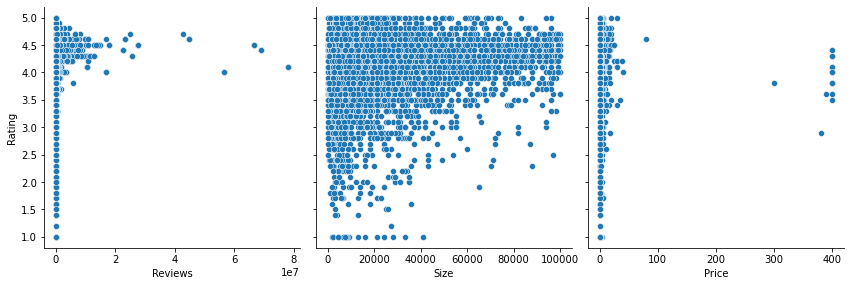

In [33]:
# Rating - Review/Size/Price 간의 관계 pairplot으로 확인하기
sns.pairplot(data, x_vars=['Reviews','Size','Price'],y_vars = "Rating",height = 4, aspect = 1, kind = "scatter")
plt.show()

=> Size와 Rating의 관계가 상대적으로 높을 것으로 보이기 때문에, 상관분석 진행

### (4) 앱 크기(App Size)와 평점(Rating) 간 상관관계 분석

In [49]:
# Pearson/Spearman 상관분석
#H0: App Size와 Rating 두 변수는 독립이다. (관련이 없다.)
#H1: App Size와 Rating 두 변수는 관련이 있다.

#Size column 중 NaN 값 제거
data_nan_del = data.dropna(subset=['Size'], how='any', axis=0)

print("PearsonResult",stats.pearsonr(data_nan_del["Size"],data_nan_del["Rating"]))
stats.spearmanr(data_nan_del["Size"],data_nan_del["Rating"])

# p-value < 0.05, reject H0, App size와 Rating 간 상관관계가 있다.

PearsonResult (0.08182800207998668, 1.6910847090613466e-12)


SpearmanrResult(correlation=0.06781646849246084, pvalue=5.028178686351999e-09)

### (5) 앱 가격(App Price)와 평점(Rating) 간 상관관계 분석

In [63]:
#Price 값 중 200 이상인 경우 drop
idx = data[data['Price'] > 200].index
data_price_under_200 = data.drop(idx) 

<AxesSubplot:xlabel='Price', ylabel='Rating'>

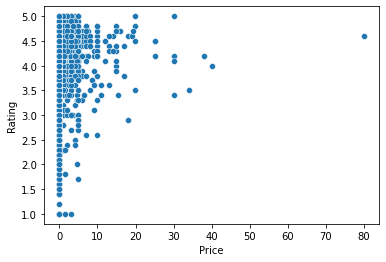

In [64]:
#시각화
sns.scatterplot(data = data_price_under_200, x = "Price", y = "Rating")

In [65]:
# Pearson/Spearman 상관분석
#H0: App Price와 Rating 두 변수는 독립이다. (관련이 없다.)
#H1: App Price와 Rating 두 변수는 관련이 있다.

print("PearsonResult",stats.pearsonr(data_price_under_200["Price"],data_price_under_200["Rating"]))
stats.spearmanr(data_price_under_200["Price"],data_price_under_200["Rating"])

# p-value < 0.05, reject H0, App Price와 Rating 간 상관관계가 없다.

PearsonResult (0.019755698056852795, 0.06282620476363346)


SpearmanrResult(correlation=0.0689669514661997, pvalue=7.935676713761941e-11)

- 결과적으로 Review와 Rating 사이에는 상관관계를 지닌다고 볼 수 있으며, 추가적으로 Rating과 상관관계를 지니는 다른 변수를 확인하고자 한 결과 Size가 Rating 사이에 상관관계를 지니고 있음을 확인할 수 있었다.

### (6) 상관관계가 존재하는 Review-Rating / Size-Rating 선형회귀분석 수행

In [58]:
import statsmodels.formula.api as sm
lr = sm.ols("Rating~Reviews", data = data).fit()

print(lr.params)
print(lr.summary())

Intercept    4.181824e+00
Reviews      1.235461e-08
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     42.13
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           8.99e-11
Time:                        13:00:00   Log-Likelihood:                -6817.8
No. Observations:                8884   AIC:                         1.364e+04
Df Residuals:                    8882   BIC:                         1.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [60]:
import statsmodels.formula.api as sm
lr = sm.ols("Rating~Size", data = data).fit()

print(lr.params)
print(lr.summary())

Intercept    4.127375
Size         0.000002
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     49.98
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.69e-12
Time:                        13:00:46   Log-Likelihood:                -6063.0
No. Observations:                7417   AIC:                         1.213e+04
Df Residuals:                    7415   BIC:                         1.214e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

=> 분석 이행 이전에는 Review 수가 Rating과 가장 큰 상관관계를 지니고 있을 것이라고 생각했는데, 분석 결과에 따르면 상관관계는 존재하나 미미하며 Review 수보다 Size와 더 높은 상관관계를 지닌다고 볼 수 있다. 